In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
target = 0

In [3]:
digits = load_digits()
digits.keys()

y = digits['target']
# y = np.array(y==1, dtype=int)
ones = y[digits['target'] == target]
not_ones = y[digits['target'] != target]

n = min(len(ones), len(not_ones))

y = np.concatenate([np.ones(n, dtype=int), np.zeros(n, dtype=int)])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
X = digits['images']
X = np.concatenate([X[digits['target'] == target][:n], X[digits['target'] != target][:n]])

X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

print(y[:5])

356 (8, 8)
[1 1 1 1 1]


In [5]:
np.unique(y, return_counts=True)

(array([0, 1]), array([178, 178]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [7]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=image_shape, 
                     n_layers=3,
                     n_classes=2,
                     activation_func=lambda x: Activations.sigmoid(x, alpha=10),
                     loss_func=torch.nn.functional.binary_cross_entropy,
                     learning_rate=1)

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 31.3 ms


In [8]:
%time clf.fit(X_train, y_train, batch_size=16, n_epochs=2000)

Epoch 1 of 2000 - train_loss: 0.7739 - train_acc: 0.7333 - val_loss: 0.5804 - val_acc: 0.7018
Epoch 2 of 2000 - train_loss: 0.3988 - train_acc: 0.7958 - val_loss: 0.4580 - val_acc: 0.7544
Epoch 3 of 2000 - train_loss: 0.3309 - train_acc: 0.8542 - val_loss: 0.4006 - val_acc: 0.8070
Epoch 4 of 2000 - train_loss: 0.3048 - train_acc: 0.8667 - val_loss: 0.3632 - val_acc: 0.8421
Epoch 5 of 2000 - train_loss: 0.2853 - train_acc: 0.8667 - val_loss: 0.3390 - val_acc: 0.8421
Epoch 6 of 2000 - train_loss: 0.2649 - train_acc: 0.8917 - val_loss: 0.3273 - val_acc: 0.8596
Epoch 7 of 2000 - train_loss: 0.2510 - train_acc: 0.8958 - val_loss: 0.3225 - val_acc: 0.8596
Epoch 8 of 2000 - train_loss: 0.2444 - train_acc: 0.9000 - val_loss: 0.3186 - val_acc: 0.8596
Epoch 9 of 2000 - train_loss: 0.2388 - train_acc: 0.9000 - val_loss: 0.3145 - val_acc: 0.8772
Epoch 10 of 2000 - train_loss: 0.2330 - train_acc: 0.9000 - val_loss: 0.3103 - val_acc: 0.8772
Epoch 11 of 2000 - train_loss: 0.2277 - train_acc: 0.9042 -

Epoch 87 of 2000 - train_loss: 0.1479 - train_acc: 0.9542 - val_loss: 0.2616 - val_acc: 0.9123
Epoch 88 of 2000 - train_loss: 0.1479 - train_acc: 0.9542 - val_loss: 0.2616 - val_acc: 0.9123
Epoch 89 of 2000 - train_loss: 0.1478 - train_acc: 0.9542 - val_loss: 0.2616 - val_acc: 0.9123
Epoch 90 of 2000 - train_loss: 0.1478 - train_acc: 0.9542 - val_loss: 0.2616 - val_acc: 0.9123
Epoch 91 of 2000 - train_loss: 0.1478 - train_acc: 0.9500 - val_loss: 0.2615 - val_acc: 0.9123
Epoch 92 of 2000 - train_loss: 0.1478 - train_acc: 0.9500 - val_loss: 0.2615 - val_acc: 0.9123
Epoch 93 of 2000 - train_loss: 0.1478 - train_acc: 0.9500 - val_loss: 0.2615 - val_acc: 0.9123
Epoch 94 of 2000 - train_loss: 0.1478 - train_acc: 0.9500 - val_loss: 0.2615 - val_acc: 0.9123
Epoch 95 of 2000 - train_loss: 0.1478 - train_acc: 0.9500 - val_loss: 0.2615 - val_acc: 0.9123
Epoch 96 of 2000 - train_loss: 0.1478 - train_acc: 0.9500 - val_loss: 0.2614 - val_acc: 0.9123
Epoch 97 of 2000 - train_loss: 0.1478 - train_acc:

Epoch 257 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 258 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 259 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 260 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 261 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 262 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 263 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2602 - val_acc: 0.9123
Epoch 264 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2601 - val_acc: 0.9123
Epoch 265 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2601 - val_acc: 0.9123
Epoch 266 of 2000 - train_loss: 0.1466 - train_acc: 0.9583 - val_loss: 0.2601 - val_acc: 0.9123
Epoch 267 of 2000 - train_loss: 0.1466 -

Epoch 427 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 428 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 429 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 430 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 431 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 432 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 433 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 434 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 435 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 436 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2598 - val_acc: 0.9123
Epoch 437 of 2000 - train_loss: 0.1465 -

Epoch 597 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 598 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 599 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 600 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 601 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 602 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 603 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 604 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 605 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 606 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2597 - val_acc: 0.9123
Epoch 607 of 2000 - train_loss: 0.1465 -

Epoch 767 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 768 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 769 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 770 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 771 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 772 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 773 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 774 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 775 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 776 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 777 of 2000 - train_loss: 0.1465 -

Epoch 937 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 938 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 939 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 940 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 941 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 942 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 943 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 944 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 945 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 946 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2596 - val_acc: 0.9123
Epoch 947 of 2000 - train_loss: 0.1465 -

Epoch 1106 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1107 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1108 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1109 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1110 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1111 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1112 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1113 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1114 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1115 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1116 of 2000 - train_los

Epoch 1191 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1192 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1193 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1194 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1195 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1196 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1197 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1198 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1199 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1200 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1201 of 2000 - train_los

Epoch 1276 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1277 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1278 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1279 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1280 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1281 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1282 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1283 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1284 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1285 of 2000 - train_loss: 0.1465 - train_acc: 0.9583 - val_loss: 0.2595 - val_acc: 0.9123
Epoch 1286 of 2000 - train_los

Epoch 1444 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1445 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1446 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1447 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1448 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1449 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1450 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1451 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1452 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1453 of 2000 - train_loss: 0.1464 - train_acc: 0.9542 - val_loss: 0.2594 - val_acc: 0.9123
Epoch 1454 of 2000 - train_los

In [9]:
clf.score(X_test, y_test)

tensor(0.9722)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        36
          1       0.97      0.97      0.97        36

avg / total       0.97      0.97      0.97        72



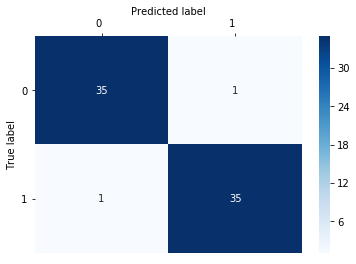

In [11]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

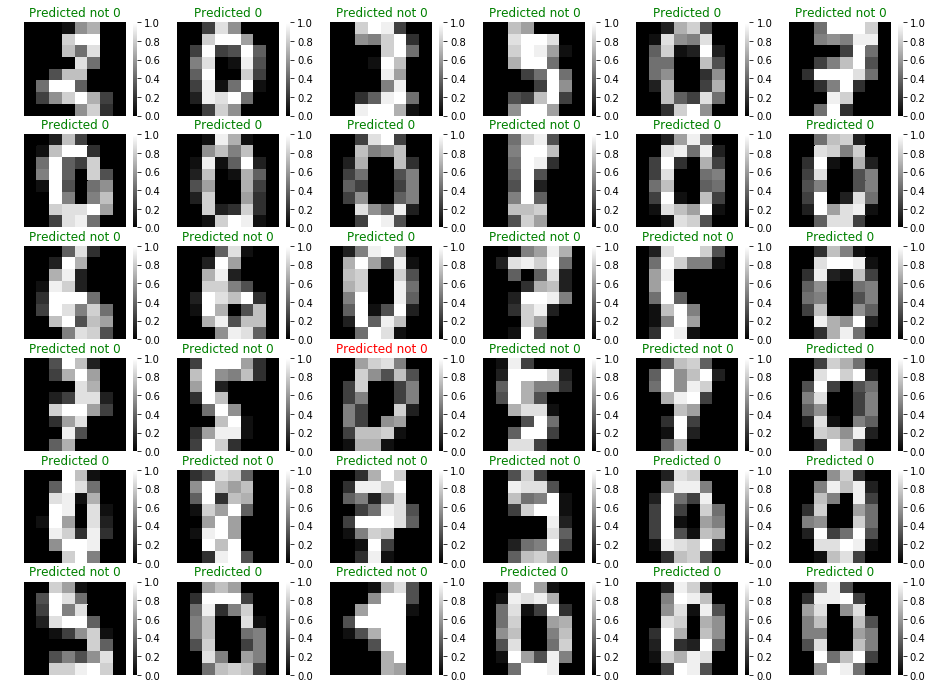

In [12]:
n_rows = 6
n_cols = 6
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2.7
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('Predicted %s%d' % ('' if actual == 1 else 'not ', target), color=color)

plt.show()

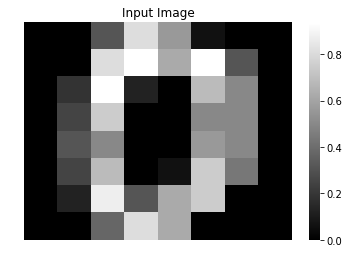

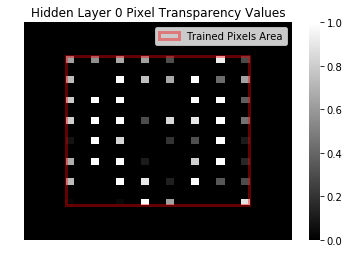

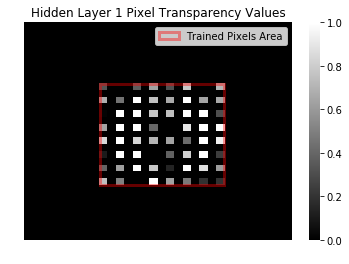

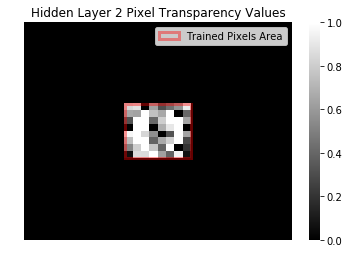

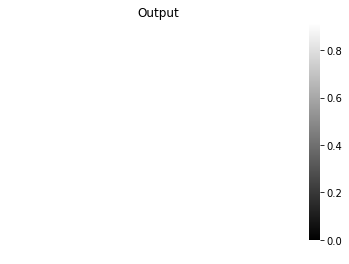

In [18]:
ax = sns.heatmap(X[0], cmap='gray')
ax.set(title='Input Image')
ax.set_axis_off()
plt.show()

for i, layer in enumerate(clf.hidden_layers):              
    ax = sns.heatmap(layer.pixel_values, vmin=0, vmax=1, cmap='gray')
    trained_pixels = clf.grid_W_map[i].keys() 

    min_extent = clf.layer_shape
    max_extent = (0, 0)

    for grid_coord in trained_pixels:
        grid_row, grid_col = grid_coord

        if grid_row < min_extent[0]:
            min_extent = (grid_row, min_extent[1])

        if grid_row > max_extent[0]:
            max_extent = (grid_row, max_extent[1])

        if grid_col < min_extent[1]:
            min_extent = (min_extent[0], grid_col)

        if grid_col > max_extent[1]:
            max_extent = (max_extent[0], grid_col)

    height = (max_extent[0] - min_extent[0]) + 0.9
    width = (max_extent[1] - min_extent[1]) + 0.9

    rect = patches.Rectangle((min_extent[1], min_extent[0]), width, height, 
                             linewidth=3, alpha=0.4, 
                             edgecolor='r', facecolor='none',
                             label='Trained Pixels Area')

    ax.add_patch(rect)

    ax.set_axis_off()
    ax.set(title='Hidden Layer %d Pixel Transparency Values' % i)
    ax.legend()
    plt.show()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, cmap='gray')
ax.set(title='Output')
ax.set_axis_off()
plt.show()